### 6.2 샤프 지수와 포트폴리오 최적화

6.2.2 포트폴리오 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', 'POSCO홀딩스', '현대자동차', '에코프로비엠']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2020-01-01', '2022-4-29')['close']

In [2]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

In [3]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns / risk)

portfolio = { 'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio }
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

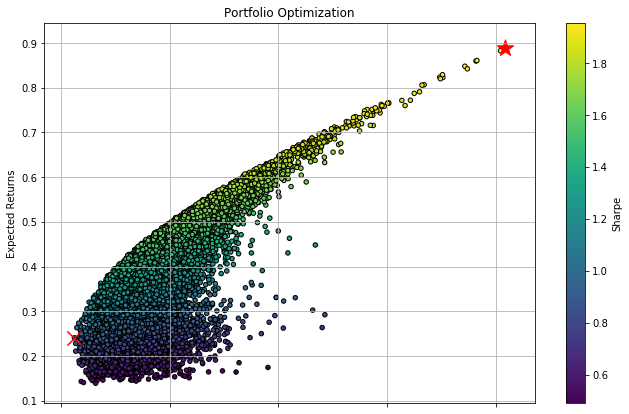

In [4]:
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11, 7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='x', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [5]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
3704,0.887737,0.45389,1.955842,0.121254,0.014261,0.006614,0.113345,0.744526


In [6]:
min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
5372,0.240756,0.256283,0.939414,0.635959,0.020248,0.185162,0.056923,0.101707
